# Modelagem 2D de uma bacia sedimentar 

**[Referência bibliográfica]**

* Talwani, M., J. L. Worzel, and M. Landisman (1959), Rapid Gravity Computations for Two-Dimensional Bodies with Application to the Mendocino Submarine Fracture Zone, J. Geophys. Res., 64(1), 49-59, doi:10.1029/JZ064i001p00049

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import talwani as tw

## Calculando as profundidades verdadeiras da bacia através de uma função matemática

In [3]:
xs = np.arange(0, 100000,100)[::-1]
depths = (-1e-15*(xs - 50000)**4 + 7000. - 2500*np.exp(-(xs - 70000)**2/(10000**2)))
depths -= depths.min()

### Visualização da bacia

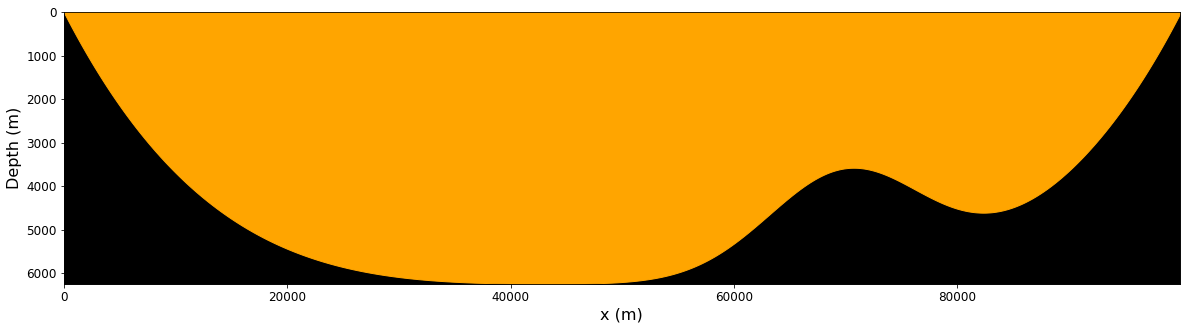

In [4]:
plt.figure(figsize=(20,5))

plt.xlabel('x (m)', fontsize = 16)
plt.ylabel('Depth (m)', fontsize = 16)
plt.fill_between(xs,depths,max(depths),color='black')
plt.fill_between(xs,depths,color='orange')
plt.xlim(min(xs),max(xs))
plt.ylim(max(depths),min(depths))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

file_name = 'images/basement2D_relief'
plt.savefig(file_name+'.png',dpi=300)

plt.show()


## Gerando as coordenadas de observação 

In [5]:
xp = np.arange(0,100000,step=500)

In [6]:
xp.size

200

In [7]:
zp = -100.*np.ones_like(xp)

## Calculando o efeito gravitacional ($g_z$) da bacia sedimentar considerando um contraste de densidade $\Delta\rho = -300 \, kg/m^3$

In [8]:
gz = tw.gz(xp,zp,xs,depths,density=-300.)

## Visualização dos dados observados

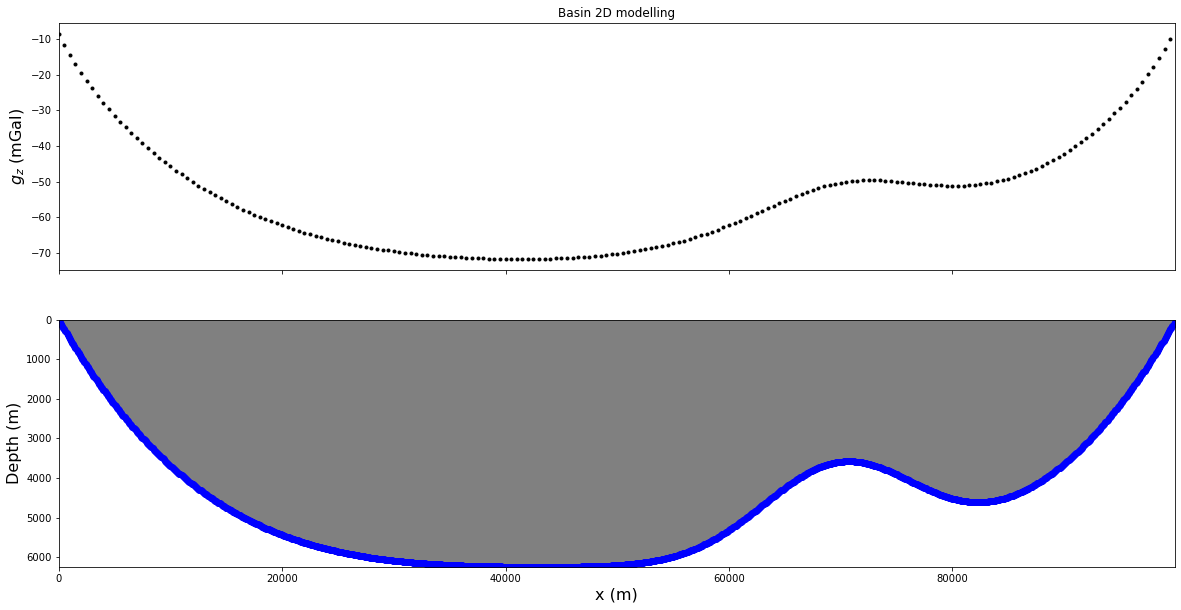

In [9]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(20,10))

## Efeito gravitacional da bacia
ax1.set_title('Basin 2D modelling')
ax1.set_ylabel('$g_z$ (mGal)', fontsize = 16)
ax1.plot(xp,gz,'k.')

## Bacia 2D
ax2.set_xlabel('x (m)', fontsize = 16)
ax2.set_ylabel('Depth (m)', fontsize = 16)
ax2.fill_between(xs,depths,max(depths),color='white')
ax2.fill_between(xs,depths,color='gray')
ax2.plot(xs,depths,'bo')
ax2.set_xlim(min(xs),max(xs))
ax2.set_ylim(max(depths),min(depths))

file_name = 'images/basement2D_relief_grav'
plt.savefig(file_name+'.png',dpi=300)


plt.show()